In [2]:
from matplotlib import pyplot as plt

# Matplotlib 库基础分析——绘图机制和方式介绍 

绘图是数据可视化最直接的方法，也是直观分析数据所必不可少的步骤。Matplotlib 是 Python 中专门用于数据可视化的第三方库，也是最为流行的绘图库。但在 Matplotlib 绘图中由于方法太多往往容易混淆不同的绘图方式，本文对 Matplotlib 绘图机制进行分析，并且通过例子对函数式和对象式这两种绘图方式进行介绍。

## 绘图机制分析

Matplotlib 中面向用户的程序可视为前端代码，通常由 `Artist` 对象处理图表、文字和曲线等的绘制和布局，每个元素都由 `Artist` 对象表示。底层的绘图操作由 Matplotlib 后端(backend)程序处理，后端针对不同的输出选择在对应的界面显示图像或者作为图像文件进行保存。因此后端的输出即包括 PyGTK、wxPython、Tkinter、Qt4 或 MacOSX 等界面类的“互动后台”，也包括 PNG，SVG，PDF，PS 等图像类的“非交互式的后台”。

用户绘图程序主要与 `Artist` 相关，`Artist` 分为简单类型和容器类型两种。简单类型的 `Artist` 为标准的绘图元素，例如 `Line2D`、 `Rectangle`、`Text`、`AxesImage` 等。而容器类型则将许多简单类型的 `Artist` 组织成一个整体，例如 `Axis`、 `Axes`、`Figure` 等。

每个 `Artist` 对象都有一系列属性控制其显示效果，可通过相应的 `get_` 和 `set_` 函数进行读写。例如 `Figure` 对象和 `Axes` 对象有 `patch` 属性作为其背景，它的值是一个 `Rectangle` 对象。通过 `set_color` 函数设置 `patch` 的 `color` 属性可以修改 `Figrue` 图表的背景颜色，修改之后调用 `fig.canvas.draw()` 函数更新显示。

In [6]:
x = np.linspace(-100, 100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


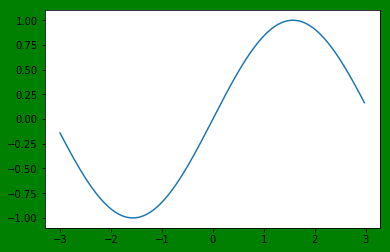

In [60]:
fig = plt.figure()
plt.plot(x, np.sin(x))
fig.show()
fig.patch.set_color("g")
fig.canvas.draw()

`Axes` 容器是整个 Matplotlib 库的核心，这里以 `Axes` 容器为例详细介绍容器类型的内容。`Axes` 容器包含了组成图表的众多 `Artist` 对象，并且有许多方法函数帮助我们创建、修改这些对象。和 `Figure` 一样，它有一个 `patch` 属性作为背景，当它是笛卡尔坐标时，`patch` 属性是一个 `Rectangle` 对象，而当它是极坐标时，`patch` 属性则是 `Circle` 对象。例如以下语句设置 `Axes` 对象的背景颜色为绿色：

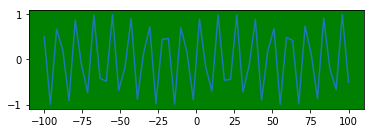

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(x, np.sin(x))
ax1.patch.set_facecolor("green")

当调用 `Axes` 的绘图方法（例如 `plot`）时，将创建一组 `Line2D` 对象，将所有的关键字参数传递给这些 `Line2D` 对象，然后将它们添加进 `Axes.lines` 属性中，最后返回所创建的 `Line2D` 对象列表：

In [13]:
line = ax1.plot(x, np.sin(x), label=u"随机误差", ls='-', c='r', lw=1)
line

一般并不直接对 `Axes.lines` 或者 `Axes.patches` 属性进行操作，而是调用 `add_line` 或者 `add_patch` 等方法完成许多属性设置工作，以下例子通过 `add_patch` 方法设置了 `rect` 的 `axes` 和 `transform` 属性：

rect.axes: None
rect.get_transform: CompositeGenericTransform(
    BboxTransformTo(
        Bbox(x0=1.0, y0=1.0, x1=6.0, y1=13.0)),
    Affine2D(
        [[1. 0. 0.]
         [0. 1. 0.]
         [0. 0. 1.]]))
ax.add_patch(rect): Rectangle(xy=(1, 1), width=5, height=12, angle=0)
rect.axes: AxesSubplot(0.125,0.125;0.775x0.755)
rect.get_transform CompositeGenericTransform(
    CompositeGenericTransform(
        BboxTransformTo(
            Bbox(x0=1.0, y0=1.0, x1=6.0, y1=13.0)),
        Affine2D(
            [[1. 0. 0.]
             [0. 1. 0.]
             [0. 0. 1.]])),
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                    TransformWrapper(
                        BlendedAffine2D(
                           

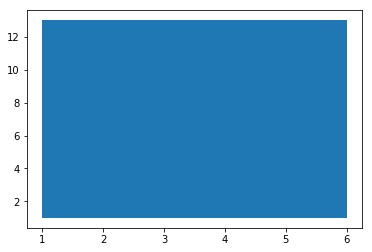

In [61]:
from matplotlib import  patches

fig = plt.figure()
ax = fig.add_subplot(111)
rect = patches.Rectangle((1, 1), width=5, height=12)


print("rect.axes:", rect.axes)  # rect的axes属性为空
print("rect.get_transform:", rect.get_transform())  # rect的transform属性为缺省值
print("ax.add_patch(rect):", ax.add_patch(rect))  # 将rect添加进ax
print("rect.axes:", rect.axes)  # 于是rect的axes属性就是ax
# rect的transform属性和ax的transData相同
print("rect.get_transform", rect.get_transform())
print("ax.transData:", ax.transData)
print("ax.get_xlim:", ax.get_xlim())  # ax的X轴范围为0到1，无法显示完整的rect
print("ax.dataLim.bounds:", ax.dataLim.bounds)  # 数据的范围和rect的大小一致
print("ax.autoscale_view:", ax.autoscale_view())  # 自动调整坐标轴范围
print("ax.get_xlim:", ax.get_xlim())  # 于是X轴可以完整显示rect
plt.show()

## 函数式绘图

MATLAB 是数据绘图领域广泛使用的语言和工具，调用函数命令可以轻松绘制图形。Matplotlib 受 MATLAB 的启发而构建，有一套完全仿照 MATLAB 函数形式的绘图 API，调用 API 即可绘制高质量的图形。下面以一个基本的绘图例程来介绍函数式绘图的方法。

1. 导入 Matplotlib 库中的 `pyplot` 模块，该模块集合了类似 MATLAB 的绘图 API
2. `xlim(min,max)` 和 `ylim(min,max)` 函数分别调节 X 轴和 Y 轴的范围
3. `xticks(location,labels)` 和 `yticks(location,labels)` 函数分别设定 X 轴和 Y 轴的坐标标签，`location` 为浮点数或整数组成的列表，表示坐标的位置；`labels` 为 `location` 等长的字符串列表，表示坐标的标签。`Rotation`参数可旋转调节坐标标签，当坐标密集时避免标签重叠。
4. `title()` 函数添加标题，参数 `loc` 可调整标题显示的位置，分别为 `center`、`left`、`right`
5. `xlabel()` 和 `yticks()` 函数添加 X 轴、Y 轴的标签
6. `grid(b=None, which='major', axis='both', **kwargs)` 函数增加并设定图形背景，便于更直观地读取线条中点的坐标取值及线条整体分布范围。参数 `b` 设定是否显示 `grid`；参数 `which` 设定坐标轴分割线类型；参数 `axis` 制定绘制 `grid` 的坐标轴。
7. `legend()` 函数增加图例显示，当多条曲线显示在同一张图中时，便于识别不同的曲线。参数 `loc` 用于设定图例在图中的显示位置，包括 `best`（最适宜位置）、`upper right`（右上角）等。注：在绘制图形时需设定 `label`，`label` 值即为图例显示的文本内容。
8. `plot()` 函数用于绘制线条，`linestyle` 参数设定线条类型，`color` 参数指定线条的颜色，`market` 参数设置数据点的形状，`linewidth` 参数设定线条的宽度，

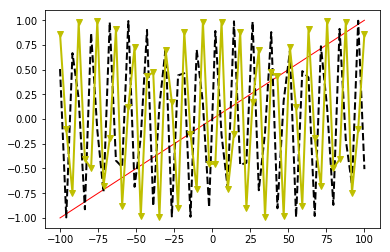

In [28]:
import matplotlib.pyplot as plt

plt.plot(x, x/100, label=u"y=x", ls='-', c='r', lw=1)
plt.plot(x, np.sin(x), label=u"sin", ls='dashed', c='k', lw=2)
plt.plot(x, np.cos(x), label=u"cos", marker='v', c='y', lw=2)
plt.show()

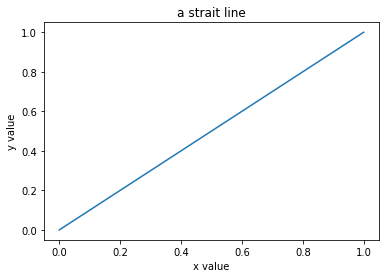

In [47]:
# a strait line: use pyplot functions

plt.plot([0, 1], [0, 1])      # plot a line from (0, 0) to (1, 1)
plt.title("a strait line")
plt.xlabel("x value")
plt.ylabel("y value")
plt.savefig("demo.jpg")

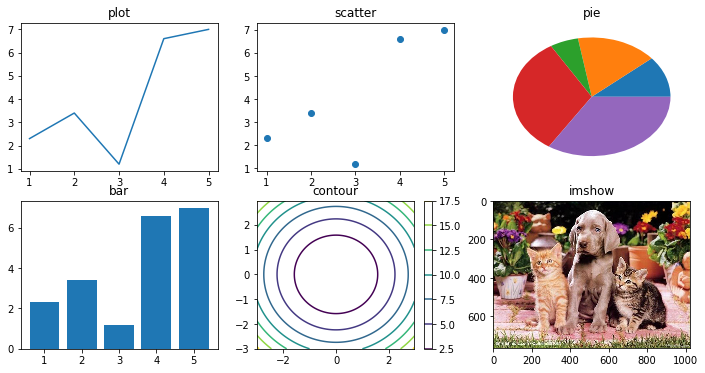

In [50]:
import matplotlib.pyplot as plt

# 1D data
x = [1, 2, 3, 4, 5]
y = [2.3, 3.4, 1.2, 6.6, 7.0]

plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.plot(x, y)
plt.title("plot")

plt.subplot(232)
plt.scatter(x, y)
plt.title("scatter")

plt.subplot(233)
plt.pie(y)
plt.title("pie")

plt.subplot(234)
plt.bar(x, y)
plt.title("bar")

# 2D data
import numpy as np
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = Y**2 + X**2

plt.subplot(235)
plt.contour(X, Y, Z)
plt.colorbar()
plt.title("contour")

# read image
import matplotlib.image as mpimg
img = mpimg.imread('../images/dog_cat.jpg')

plt.subplot(236)
plt.imshow(img)
plt.title("imshow")

plt.savefig("temp/matplot_sample.jpg")

[Python 中的函数式编程是通过封装对象实现的](http://www.cnblogs.com/vamei/archive/2012/11/19/2772441.html)，Matplotlib 中的函数式调用也是如此。Matplotlib 本质上还是以构建对象方式来绘制图像，函数式编程将构建对象的过程封装在函数中，从而让我们觉得很方便。

## 对象式绘图

Matplotlib 库是由一系列有组织有隶属关系的对象构成的，函数式绘图在原有的对象上增加了一层调用接口，不仅降低了效率，而且掩盖原有的隶属关系，无法体现对象体系中细节功能。为此本文引入 `Figure` 和 `FigureCanvas` 两个类，将以上的绘图过程更改为面向对象式(OO, object-oriented)绘图。

> 1.1 图像中对象隶属关系

> 1.2 `pyplot` 模块中的 `figure()` 函数创建名为 `fig` 的 `Figure` 对象

In [29]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

> 1.3 在 `Figure` 对象中创建两个 `Axes` 对象，每个 `Axes` 对象即为一个绘图区域。`add_axes()` 和 `add_subplot()` 方法都返回一个  `matplotlib.axes.Axes` 对象。`add_axes(rect)` 中 `rect` 表示图坐标 `[x0, y0, width, height]` 中新区域左下角的坐标 $(x0,y0)$ 及其宽度和高度，即为画布上的绝对坐标。`add_subplot` 根据三个整数自动分配子区域在栅格的坐标位置。`add_subplot(221)` 表示图像为 $2\times 2$排列，当前选中的是第一个图像。

In [30]:
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.3])
ax2 = fig.add_axes([0.5, 0.5, 0.4, 0.3])
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

> 1.4 在 `Axes` 对象中增加坐标轴标签 `label` 对象、`tick` 对象、`ticklabel` 对象和标题 `title` 对象，也可以对坐标轴的取值范围 `xlim` 和 `ylim` 进行设定。

In [45]:
ylim_min, ylim_max = -100, 100
yticks_min, yticks_max, ylim_setp = 0, len(x), 2

ax1 = fig.add_subplot(211)
ax1.plot(x, x + np.random.normal(), label=u"随机误差", ls='-', c='r', lw=1)
ax1.set_xlim(0, len(x))  #调节X轴范围
ax1.set_ylim(ylim_min, ylim_max)  #调节Y轴范围
ax1.set_xticks(np.arange(0, len(x), 2))
ax1.set_yticks(np.arange(yticks_min, yticks_max, ylim_setp))
ax1.set_xticklabels(
    [
        '2015-02-01', '2015-03-01', '2015-04-02', '2015-05-02', '2015-06-02',
        '2015-07-02', '2015-08-02', '2015-09-02', '2015-10-02', '2015-11-02'
    ],
    fontsize='small')
ax1.set_yticklabels([u'上限预警值', u'标准值', u'下限预警值'])
ax1.set_title(u"面向对象绘图子图1")
ax1.set_xlabel(u"日期")
ax1.set_ylabel(u"数值")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


> 1.5 `plt.subplot()` 方法可更为方便地创建 `Figure` 和 `subplot` ，在创建新的 `Figure` 同时返回一个含有已创建的 `subplot` 对象的 Numpy 数组，因此可以对 `axes` 数组进行索引。其中 `sharex` 参数为 `True` 时所有 `subplot` 使用相同的 X 轴刻度，`sharey` 参数为 `True` 时所有 `subplot` 使用相同的 Y 轴刻度。

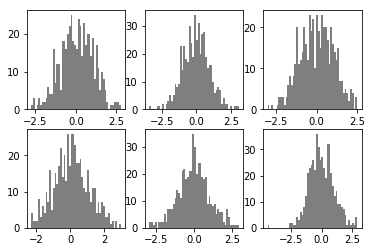

In [46]:
fig_ps, axes_ps = plt.subplots(2, 3)

for i in range(2):
    for j in range(3):
        axes_ps[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

我们引入两个类: `Figure` 和 `FigureCanvas`。(函数式编程也调用了这些类，只是调用的过程被函数调用所遮掩。)

In [52]:
# object-oriented plot

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig    = Figure()
canvas = FigureCanvas(fig)
ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])

line,  = ax.plot([0,1], [0,1])
ax.set_title("a straight line (OO)")
ax.set_xlabel("x value")
ax.set_ylabel("y value")

canvas.print_figure('temp/demo.jpg')

### 理解对象

上面的例子中，我们至少构建了四个对象： `fig`, `canvas`, `ax`, `line`。它们分别属于 `Figure`类，`FigureCanvas`类，`Axes`类和 `Line2D` 类。(使用 `obj.__class__.__name__` 来查询对象所属的类)

在深入各个对象之前，我们先来做一个比喻。看下面一个图片：

![](../images/plt_OOP.png)

可以看到，图中有一个房子，房子上有窗户和门，窗户上有条纹，门上有把手，此外图像外还有一只小乌龟。我们所提到的房子，窗户，门，条纹，把手，都可以称其为对象。不同的对象之间有依附关系，比如窗户和门属于房子，而把手属于门。乌龟和房子则是并行的两个对象。此外，整个图像外有一个方框，用来表明可绘图的范围，所有上面提到的元素都依附于该方框。

这就是用面向对象的方式来理解一个图像。事实上，对象是描述图像的最自然的方式，面向对象编程最成功的领域就是在计算机图形方面。

我们先来看什么是 `Figure` 和 `Axes` 对象。在 Matplotlib 中，整个图像为一个 `Figure` 对象，所有元素依附于 `Figure` 对象中。在 `Figure` 对象中可以包含一个或者多个 `Axes` 对象。每个 `Axes` 对象各自拥有坐标系统的绘图区域，包含各自的 `Title`（标题）、`Axis`（坐标轴）、`Label`（坐标轴标注）、`Tick`（刻度线）、`Tick Label`（刻度注释）等对象元素。对象隶属关系如下所示：

![](../images/articlex.png)

`Title` 为标题。`Axis` 为坐标轴，`Label` 为坐标轴标注。`Tick` 为刻度线，`Tick Label` 为刻度注释。

转过头来看直线图。整个图像是 `fig` 对象。我们的绘图中只有一个坐标系区域，也就是 `ax`。此外还有以下对象。(括号中表示对象的基本类型)

![](../images/说明.png)

尽管 `data` 是数据绘图的关键部分，也就是数据本身的图形化显示，但是必须和 `xaxis`, `yaxis`, `title` 一起，才能真正构成一个绘图区域 `axes`。一个单纯的，无法读出刻度的线是没有意义的。`xaxis`, `yaxis`, `title` 合起来构成了数据的辅助部分(data guide)。

上面元素又包含有多种图形元素。比如说，我们的 `data` 对象是一条线(`Line2D`)。`title`, `tick label` 和 `label` 都是文本(`Text`)，而 `tick` 是由短线(`Line 2D`)和 `tick label` 构成，`xaxis` 由坐标轴的线和 `tick` 以及 `label` 构成，`ax` 由 `xaxis`, `yaxis`, `title`, `data` 构成， `ax` 自身又构成了 `fig` 的一部分。上面的每个对象，无论是 `Line2D`, `Text`还是 `fig`，它们都来自于一个叫做 `Artist` 的基类。

OO 绘图的原程序还有一个 `canvas` 对象。它代表了真正进行绘图的后端(backend)。`Artist` 只是在程序逻辑上的绘图，它必须连接后端绘图程序才能真正在屏幕上绘制出来(或者保存为文件)。我们可以将 `canvas` 理解为绘图的物理(或者说硬件)实现。

在 OO 绘图程序中，我们并没有真正看到 `title`, `tick`, `tick label`, `xaxis`, `yaxis` 对象，而是使用 `ax.set_*` 的方法间接设置了这些对象。但这些对象是真实存在的，你可以从上层对象中找到其“真身”。比如，`fig.axes[0].xaxis` 就是我们上面途中的 `xaxis` 对象。我们可以通过 `fig -> axes[0]` (也就是 `ax) -> xaxis` 的顺序找到它。因此，重复我们刚才已经说过的，一个 `fig` 就构成了一个完整的图像。对于每个 `Artist` 类的对象，都有 `findobj()` 方法，来显示该对象所包含的所有下层对象。

### 坐标

坐标是计算机绘图的基础。计算机屏幕是由一个个像素点构成的。想要在屏幕上显示图像，计算机必须告诉屏幕每个像素点上显示什么。所以，最贴近硬件的坐标体系是以像素为单位的坐标体系。我们可以通过具体说明像素位置来标明显示器上的某一点。这叫做显示坐标(display coordinate)，以像素为单位。

然而，像素坐标不容易被纳入绘图逻辑。相同的程序，在不同的显示器上就要调整像素值，以保证图像不变形。所以一般情况下，还会有图像坐标和数据坐标。

图像坐标将一张图的左下角视为原点，将图像的 x 方向和 y 方向总长度都看做 $1$。x 方向的 $0.2$ 就是指 $20\%$ 的图像在 x 方向的总长，y 方向 $0.8$ 的长度指 $80\%$的 y 方向总长。$(0.5, 0.5)$ 是图像的中点，$(1, 1)$ 指图像的右上角。比如下面的程序，我们在使用 `add_axes` 时，传递的参数中，前两个元素为 `axes` 的左下角在fig的图像坐标上的位置，后两个元素指 `axes` 在 `fig` 的图像坐标上 x 方向和 y 方向的长度。`fig` 的图像坐标称为 `Figure` 坐标，储存在为 `fig.transFigure`

(类似的，每个 `axes`，比如 `ax1`，有属于自己的图像坐标。它以 `ax1` 绘图区域总长作为 $1$，称为 `Axes` 坐标。也就是 `ax1.transAxes`。$(0.5, 0.5)$ 就表示在 `Axes` 的中心。`Axes` 坐标和 `Figure` 坐标原理相似，只是所用的基准区域不同。)

In [54]:
# object-oriented plot
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = Figure()
canvas = FigureCanvas(fig)

# first axes
ax1 = fig.add_axes([0.1, 0.1, 0.2, 0.2])
line, = ax1.plot([0, 1], [0, 1])
ax1.set_title("ax1")

# second axes
ax2 = fig.add_axes([0.4, 0.3, 0.4, 0.5])
sca = ax2.scatter([1, 3, 5], [2, 1, 2])
ax2.set_title("ax2")

canvas.print_figure('temp/demo1.jpg')

我们在绘图，比如使用 `plot` 的时候，绘制了两点间的连线。这两点分别为 $(0, 0)$ 和 $(1, 1)$。(`plot` 中的第一个表为两个 x 坐标，第二个表为两个 y 坐标)。这时使用的坐标系为数据坐标系(`ax1.transData`)。我们可以通过绘出的坐标轴读出数据坐标的位置。

![]('./temp/demo1.jpg')

如果绘制的是具体数据，那么数据坐标符合我们的需求。如果绘制的是标题这样的附加信息，那么 `Axes` 坐标符合符合我们的需求。如果是整个图像的注解，那么 `Figure` 坐标更符合需求。每一个 `Artist` 对象都有一个 `transform` 属性，用于查询和改变所使用的坐标系统。如果为显示坐标， `transform` 属性为 `None`。

### 深入基础

在上面的例子中，无论是使用 `plot` 绘制线，还是 `scatter` 绘制散点，它们依然是比较成熟的函数。matplotlib 实际上提供了更大的自由度，允许用户以更基础的方式来绘制图形，比如下面，我们绘制一个五边形。

In [56]:
# object-oriented plot

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    (0., 0.),
    (0., 1.),
    (0.5, 1.5),
    (1., 1.),
    (1., 0.),
    (0., 0.),
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

patch = patches.PathPatch(path, facecolor='coral')
ax.add_patch(patch)
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 2)

canvas.print_figure('temp/demo2.jpg')

在上面的程序中。我们首先确定顶点，然后构建了一个 `path` 对象，这个对象实际上就是 $5$ 个顶点的连线。在 `codes` 中，我们先使用 `MOVETO` 将画笔移动到起点，然后依次用直线连接(`LINETO`)(我们也可以用曲线来连线，比如 `CURVE4`，但这里没有用到)。 在 `path` 建立了封闭的 $5$ 边形后，我们在 `path` 的基础上构建了 `patch` 对象，是一个图形块。`patch` 的背景颜色选为 `coral`。最后，我们将这个 `patch` 对象添加到预先准备好的 `ax` 上，就完成了整个绘图。

上面的过程中，我们就好像拿着一个画笔的小孩，一步步画出心目中的图画。这就是深入理解 matplotlib 的魅力所在——创造你自己的数据绘图函数！
(将上面的程序封装到函数中，保留顶点以及其它参数接口，就构成了一个五边形绘图函数。O(∩_∩)O~ 我们也创造了新的“一键绘图”)
 
可以相像，一个 `plot` 函数如何用 `path` 对象实现。 

## 总结

我们已经了解了 matplotlib 的最重要的方面，它们是：

1. pyplot函数绘图借口
2. 对象如何组合成为图像
3. 坐标系统

希望我的讲解没有消耗完你对 matplotlib 的兴趣。事实上，matplotlib 是发展相当迅猛的绘图包，而它的开放性也让它成为了解计算机图形学的一个好接口。利用开放的核心对象，你可以随心的定制自己的数据绘图，而不用受制于高层的调用函数。谢谢 John D. Hunter。